In [0]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
# BASE IMPORTS
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

import utils

In [2]:
dframe = utils.load_data_frame(utils.GPCI_FLAG, utils.ALL_CITIES)

In [3]:
# build the dataframe with averaged values for each indicator over the years
dframe_avg = DataFrame()
for col in dframe.columns:
    dframe_avg[col] = dframe[col].map(Series.mean)

In [4]:
# Imputing missing values
from sklearn import preprocessing
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean')
data = imp.fit_transform(dframe_avg)
dframe_imp = DataFrame(data, index=dframe_avg.index, columns=dframe_avg.columns)

/home/martibosch/.virtualenvs/urbansprawl/src/matplotlib/lib/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

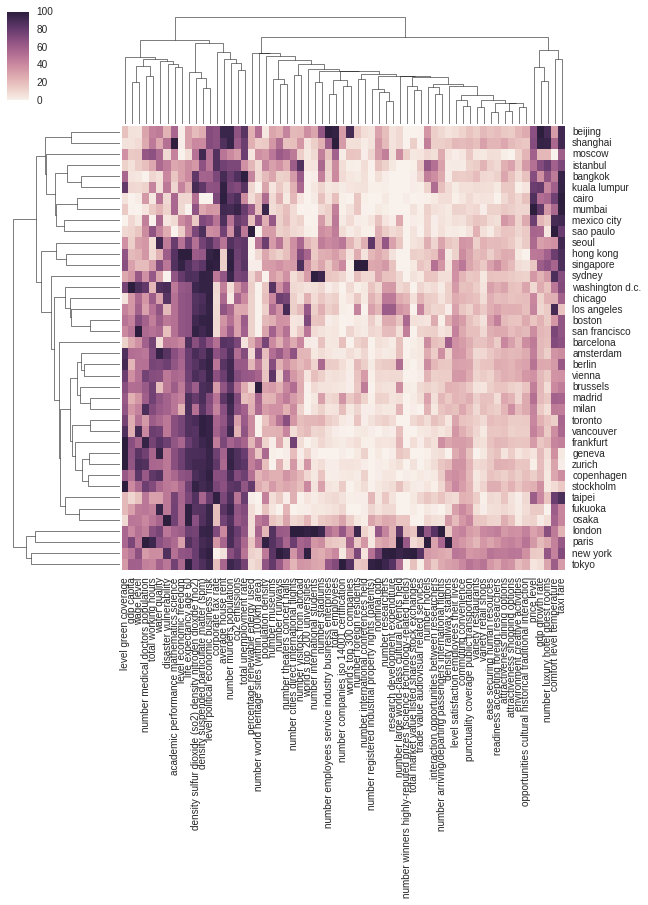

In [5]:
plt.figure()
cg = sns.clustermap(dframe_imp)
plt.setp(cg.ax_heatmap.get_yticklabels(), rotation=0)

In [6]:
def clusters_from_labels(cluster_labels, dframe, kind='rows'):
    cluster_dict = {}
    for i, label in enumerate(cluster_labels):
        if label in cluster_dict:
            if kind=='columns':
                cluster_dict[label].append(dframe.columns[i])
            else:
                cluster_dict[label].append(dframe.index[i])
        else:
            if kind=='columns':
                cluster_dict[label] = [dframe.columns[i]]
            else:
                cluster_dict[label] = [dframe.index[i]]
    return cluster_dict

In [46]:
# build flat column-clustering from the hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

{1: ['academic performance mathematics science',
  'disaster vulnerability',
  'gdp capita',
  'level economic freedom',
  'number medical doctors population',
  'total working hours',
  'wage level',
  'water quality'],
 2: ['level green coverage'],
 3: ['density sulfur dioxide (so2) density nitrogen dioxide (no2)',
  'density suspended particulate matter (spm)',
  'level political economic business risk',
  'life expectancy age 60'],
 4: ['co2 emissions', 'number murders population', 'total unemployment rate'],
 5: ['average house rent'],
 6: ['corporate tax rate'],
 7: ['attractiveness dining options',
  'attractiveness shopping options',
  'commuting convenience',
  'density railway stations',
  'ease securing human resources',
  'environment creative activities',
  'interaction opportunities between researchers',
  'level satisfaction employees their lives',
  'nominal gdp',
  'number arriving/departing passengers international flights',
  'number cities direct international fligh

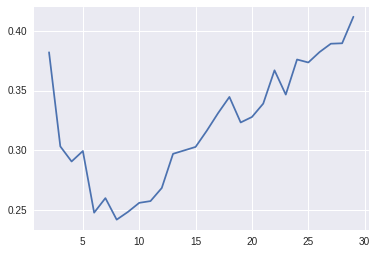

In [53]:
# determine appropriate number of clusters for the indicators (columns)

Z_col = cg.dendrogram_col.linkage
t_col_range = range(2,30)

silhouette_col_avgs = np.array(list(silhouette_score(dframe_imp.T.values, fcluster(Z_col, t_col, criterion='maxclust')) for t_col in t_col_range))
sns.plt.plot(t_col_range, silhouette_col_avgs)

t_col = 13 
cluster_labels_col = fcluster(Z_col, t_col, criterion='maxclust')
cluster_dict_col = clusters_from_labels(cluster_labels_col, dframe_imp, 'columns')
cluster_dict_col

{1: ['beijing', 'shanghai'],
 2: ['bangkok',
  'cairo',
  'istanbul',
  'kuala lumpur',
  'mexico city',
  'mumbai',
  'sao paulo'],
 3: ['moscow'],
 4: ['hong kong', 'seoul', 'singapore'],
 5: ['boston', 'chicago', 'los angeles', 'san francisco', 'washington d.c.'],
 6: ['amsterdam',
  'barcelona',
  'berlin',
  'brussels',
  'copenhagen',
  'frankfurt',
  'fukuoka',
  'geneva',
  'madrid',
  'milan',
  'osaka',
  'stockholm',
  'taipei',
  'toronto',
  'vancouver',
  'vienna',
  'zurich'],
 7: ['sydney'],
 8: ['london'],
 9: ['paris'],
 10: ['new york'],
 11: ['tokyo']}

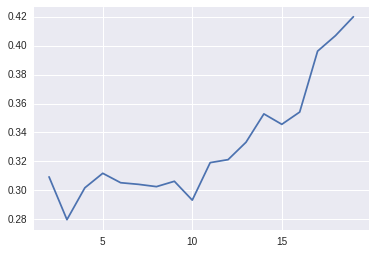

In [48]:
# determine appropriate number of clusters for the cities (rows)

Z_row = cg.dendrogram_row.linkage
t_row_range = range(2,20)

silhouette_row_avgs = np.array(list(silhouette_score(dframe_imp.values, fcluster(Z_row, t_row, criterion='maxclust')) for t_row in t_row_range))
sns.plt.plot(t_row_range, silhouette_row_avgs)

t_row = 11
cluster_labels_row = fcluster(Z_row, t_row, criterion='maxclust')
cluster_dict_row = clusters_from_labels(cluster_labels_row, dframe_imp)
cluster_dict_row